In [1]:
# Cell 1: Imports
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb

from data.load_data import loadTrainingData
from plots.feature_plots import plot_roc_auc, plot_confusion_matrix
from features.create_feature_vectors import extract_features_with_expanding_window
from data.processed_data import save_feature_data,load_feature_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Cell 2: Load data
directories = ['../../../training_setA/', '../../../training_setB/']
max_files = None  # Adjust as needed

patient_dict = {}

for directory in directories:
    pattern = os.path.join(directory, "*.psv")
    print(f"\nLoading data from: {pattern} with max_files={max_files}")
    patient_data = loadTrainingData(
        pattern,
        max_files,
        ignore_columns=['Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime']
    )
    patient_dict.update(patient_data)



Loading data from: ../../../training_setA/*.psv with max_files=1000


Loading PSV Files: 100%|██████████████████| 1000/1000 [00:00<00:00, 1066.88it/s]



Loading data from: ../../../training_setB/*.psv with max_files=1000


Loading PSV Files: 100%|██████████████████| 1000/1000 [00:00<00:00, 1020.31it/s]


In [3]:
# Cell 3: Create features
feature_df = extract_features_with_expanding_window(patient_dict)
feature_df.head(10)  # Adjust as needed for a quick glance

# Drop non-feature columns if present
for col in ["patient_id", "window_size"]:
    if col in feature_df.columns:
        feature_df.drop(columns=[col], inplace=True, errors="ignore")

save_feature_data(feature_df)

(77415, 36)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.it/s]
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s0:00<01:20, 24.68it
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.0s0:01<00:48, 40.31it
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.4s00:04<00:45, 40.64i
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    7.8s00:07<00:46, 36.82i
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   12.2s00:12<00:46, 33.72i
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   17.5s00:17<00:32, 41.63i
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:   23.5s00:23<00:29, 37.71i
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   31.0s00:30<00:26, 32.18
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   39.0s00:39<00:14, 38.19
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   48.0s00:47<00:05, 37.84
extracting features with expanding window: 100%|█| 2000/2000 [00:53<00:00, 37.63
[Parallel(n_jobs=-1)]: Done 

Final shape of expanded feature DataFrame: (77415, 281)
Feature data saved to feature_data.pkl


In [4]:
# Separate features and target
X = feature_df.drop(columns=["SepsisLabel"], errors="ignore")
y = feature_df["SepsisLabel"]

In [5]:
# Testing Rolling Box
for df in patient_dict.values():
    test = df
    break
    
test.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,ICULOS,SepsisLabel
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,1.0,7.40,47.0,77.0,NaN,53.0,NaN,NaN,111.0,2.1,NaN,107.0,2.4,NaN,NaN,3.7,NaN,NaN,27.9,8.8,38.1,9.9,223.0,160.0,3,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,0.5,7.40,NaN,NaN,NaN,53.0,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.9,8.8,NaN,9.9,NaN,NaN,4,0
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,NaN,7.34,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.5,NaN,NaN,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,NaN,7.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0
5,76.0,100.0,36.20,124.00,65.0,41.50,14.0,NaN,0.0,25.0,0.5,7.34,48.0,NaN,NaN,45.0,NaN,NaN,109.0,2.0,NaN,151.5,1.3,NaN,NaN,4.7,NaN,NaN,28.5,8.8,NaN,12.0,NaN,169.0,8,0
6,70.0,100.0,36.10,120.25,65.0,43.00,14.0,NaN,0.0,25.0,NaN,7.34,NaN,NaN,NaN,45.0,NaN,NaN,109.0,NaN,NaN,NaN,1.3,NaN,NaN,4.7,NaN,NaN,28.5,8.8,NaN,12.0,NaN,NaN,9,0
7,67.0,100.0,36.40,130.50,73.0,49.00,14.0,NaN,0.0,NaN,NaN,7.38,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0
8,64.5,100.0,36.55,116.75,62.5,42.50,14.0,NaN,0.0,NaN,NaN,7.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0
9,65.0,99.0,36.90,117.50,61.0,43.50,21.0,NaN,NaN,24.0,0.5,NaN,NaN,NaN,NaN,43.0,NaN,8.0,108.0,2.0,NaN,107.0,NaN,2.8,2.2,5.1,NaN,NaN,29.9,9.5,29.7,10.1,NaN,154.0,12,0


In [6]:
feature_df.head(10)

,HR_ns_NaN,HR_sw_mean_5,HR_sw_min_5,HR_sw_max_5,HR_sw_median_5,HR_sw_var_5,HR_sw_q95_5,HR_sw_q99_5,HR_sw_q05_5,HR_sw_q01_5,HR_sw_mean_11,HR_sw_min_11,HR_sw_max_11,HR_sw_median_11,HR_sw_var_11,HR_sw_q95_11,HR_sw_q99_11,HR_sw_q05_11,HR_sw_q01_11,HR_last,O2Sat_ns_NaN,O2Sat_sw_mean_5,O2Sat_sw_min_5,O2Sat_sw_max_5,O2Sat_sw_median_5,O2Sat_sw_var_5,O2Sat_sw_q95_5,O2Sat_sw_q99_5,O2Sat_sw_q05_5,O2Sat_sw_q01_5,O2Sat_sw_mean_11,O2Sat_sw_min_11,O2Sat_sw_max_11,O2Sat_sw_median_11,O2Sat_sw_var_11,O2Sat_sw_q95_11,O2Sat_sw_q99_11,O2Sat_sw_q05_11,O2Sat_sw_q01_11,O2Sat_last,Temp_ns_NaN,Temp_sw_mean_5,Temp_sw_min_5,Temp_sw_max_5,Temp_sw_median_5,Temp_sw_var_5,Temp_sw_q95_5,Temp_sw_q99_5,Temp_sw_q05_5,Temp_sw_q01_5,Temp_sw_mean_11,Temp_sw_min_11,Temp_sw_max_11,Temp_sw_median_11,Temp_sw_var_11,Temp_sw_q95_11,Temp_sw_q99_11,Temp_sw_q05_11,Temp_sw_q01_11,Temp_last,SBP_ns_NaN,SBP_sw_mean_5,SBP_sw_min_5,SBP_sw_max_5,SBP_sw_median_5,SBP_sw_var_5,SBP_sw_q95_5,SBP_sw_q99_5,SBP_sw_q05_5,SBP_sw_q01_5,SBP_sw_mean_11,SBP_sw_min_11,SBP_sw_max_11,SBP_sw_median_11,SBP_sw_var_11,SBP_sw_q95_11,SBP_sw_q99_11,SBP_sw_q05_11,SBP_sw_q01_11,SBP_last,MAP_ns_NaN,MAP_sw_mean_5,MAP_sw_min_5,MAP_sw_max_5,MAP_sw_median_5,MAP_sw_var_5,MAP_sw_q95_5,MAP_sw_q99_5,MAP_sw_q05_5,MAP_sw_q01_5,MAP_sw_mean_11,MAP_sw_min_11,MAP_sw_max_11,MAP_sw_median_11,MAP_sw_var_11,MAP_sw_q95_11,MAP_sw_q99_11,MAP_sw_q05_11,MAP_sw_q01_11,MAP_last,DBP_ns_NaN,DBP_sw_mean_5,DBP_sw_min_5,DBP_sw_max_5,DBP_sw_median_5,DBP_sw_var_5,DBP_sw_q95_5,DBP_sw_q99_5,DBP_sw_q05_5,DBP_sw_q01_5,DBP_sw_mean_11,DBP_sw_min_11,DBP_sw_max_11,DBP_sw_median_11,DBP_sw_var_11,DBP_sw_q95_11,DBP_sw_q99_11,DBP_sw_q05_11,DBP_sw_q01_11,DBP_last,Resp_ns_NaN,Resp_sw_mean_5,Resp_sw_min_5,Resp_sw_max_5,Resp_sw_median_5,Resp_sw_var_5,Resp_sw_q95_5,Resp_sw_q99_5,Resp_sw_q05_5,Resp_sw_q01_5,Resp_sw_mean_11,Resp_sw_min_11,Resp_sw_max_11,Resp_sw_median_11,Resp_sw_var_11,Resp_sw_q95_11,Resp_sw_q99_11,Resp_sw_q05_11,Resp_sw_q01_11,Resp_last,HR_miss_LC_mean,HR_miss_LC_var,HR_miss_LCV_sum,HR_miss_LCV_var,O2Sat_miss_LC_mean,O2Sat_miss_LC_var,O2Sat_miss_LCV_sum,O2Sat_miss_LCV_var,Temp_miss_LC_mean,Temp_miss_LC_var,Temp_miss_LCV_sum,Temp_miss_LCV_var,SBP_miss_LC_mean,SBP_miss_LC_var,SBP_miss_LCV_sum,SBP_miss_LCV_var,MAP_miss_LC_mean,MAP_miss_LC_var,MAP_miss_LCV_sum,MAP_miss_LCV_var,DBP_miss_LC_mean,DBP_miss_LC_var,DBP_miss_LCV_sum,DBP_miss_LCV_var,Resp_miss_LC_mean,Resp_miss_LC_var,Resp_miss_LCV_sum,Resp_miss_LCV_var,EtCO2_miss_LC_mean,EtCO2_miss_LC_var,EtCO2_miss_LCV_sum,EtCO2_miss_LCV_var,BaseExcess_miss_LC_mean,BaseExcess_miss_LC_var,BaseExcess_miss_LCV_sum,BaseExcess_miss_LCV_var,HCO3_miss_LC_mean,HCO3_miss_LC_var,HCO3_miss_LCV_sum,HCO3_miss_LCV_var,FiO2_miss_LC_mean,FiO2_miss_LC_var,FiO2_miss_LCV_sum,FiO2_miss_LCV_var,pH_miss_LC_mean,pH_miss_LC_var,pH_miss_LCV_sum,pH_miss_LCV_var,PaCO2_miss_LC_mean,PaCO2_miss_LC_var,PaCO2_miss_LCV_sum,PaCO2_miss_LCV_var,SaO2_miss_LC_mean,SaO2_miss_LC_var,SaO2_miss_LCV_sum,SaO2_miss_LCV_var,AST_miss_LC_mean,AST_miss_LC_var,AST_miss_LCV_sum,AST_miss_LCV_var,BUN_miss_LC_mean,BUN_miss_LC_var,BUN_miss_LCV_sum,BUN_miss_LCV_var,Alkalinephos_miss_LC_mean,Alkalinephos_miss_LC_var,Alkalinephos_miss_LCV_sum,Alkalinephos_miss_LCV_var,Calcium_miss_LC_mean,Calcium_miss_LC_var,Calcium_miss_LCV_sum,Calcium_miss_LCV_var,Chloride_miss_LC_mean,Chloride_miss_LC_var,Chloride_miss_LCV_sum,Chloride_miss_LCV_var,Creatinine_miss_LC_mean,Creatinine_miss_LC_var,Creatinine_miss_LCV_sum,Creatinine_miss_LCV_var,Bilirubin_direct_miss_LC_mean,Bilirubin_direct_miss_LC_var,Bilirubin_direct_miss_LCV_sum,Bilirubin_direct_miss_LCV_var,Glucose_miss_LC_mean,Glucose_miss_LC_var,Glucose_miss_LCV_sum,Glucose_miss_LCV_var,Lactate_miss_LC_mean,Lactate_miss_LC_var,Lactate_miss_LCV_sum,Lactate_miss_LCV_var,Magnesium_miss_LC_mean,Magnesium_miss_LC_var,Magnesium_miss_LCV_sum,Magnesium_miss_LCV_var,Phosphate_miss_LC_mean,Phosphate_miss_LC_var,Phosphate_miss_LCV_sum,Phosphate_miss_LCV_var,Potassium_miss_LC_mean,Potassium_miss_LC_var,Potassium_miss_LCV_sum,Pot

In [7]:
# Cell 4: Train/test split
neg_samples, pos_samples = y.value_counts()
print(f"Negative samples: {neg_samples}, Positive samples: {pos_samples}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Negative samples: 76055, Positive samples: 1360


In [8]:
# Cell 5: Train model
model = xgb.XGBClassifier(
    random_state=42,
    objective='binary:logistic',
    eval_metric="auc",
    scale_pos_weight=neg_samples / pos_samples
)
model.fit(X_train, y_train, 
          eval_set=[(X_test, y_test)],
          verbose=1)

[0]	validation_0-auc:0.87844
[1]	validation_0-auc:0.91837
[2]	validation_0-auc:0.92847
[3]	validation_0-auc:0.93331
[4]	validation_0-auc:0.94287
[5]	validation_0-auc:0.94636
[6]	validation_0-auc:0.95302
[7]	validation_0-auc:0.95637
[8]	validation_0-auc:0.96102
[9]	validation_0-auc:0.96363
[10]	validation_0-auc:0.96844
[11]	validation_0-auc:0.97495
[12]	validation_0-auc:0.97853
[13]	validation_0-auc:0.98126
[14]	validation_0-auc:0.98241
[15]	validation_0-auc:0.98234
[16]	validation_0-auc:0.98302
[17]	validation_0-auc:0.98231
[18]	validation_0-auc:0.98441
[19]	validation_0-auc:0.98511
[20]	validation_0-auc:0.98559
[21]	validation_0-auc:0.98659
[22]	validation_0-auc:0.98762
[23]	validation_0-auc:0.98870
[24]	validation_0-auc:0.98924
[25]	validation_0-auc:0.98946
[26]	validation_0-auc:0.99008
[27]	validation_0-auc:0.99075
[28]	validation_0-auc:0.99066
[29]	validation_0-auc:0.99086
[30]	validation_0-auc:0.99103
[31]	validation_0-auc:0.99221
[32]	validation_0-auc:0.99234
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Subset ROC AUC (predicted=1 or actual=1): 0.833


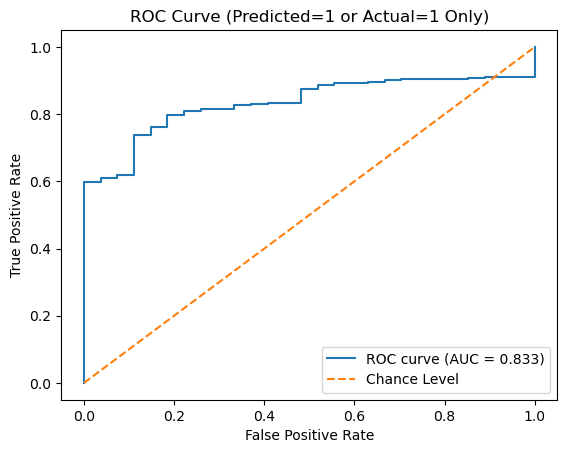

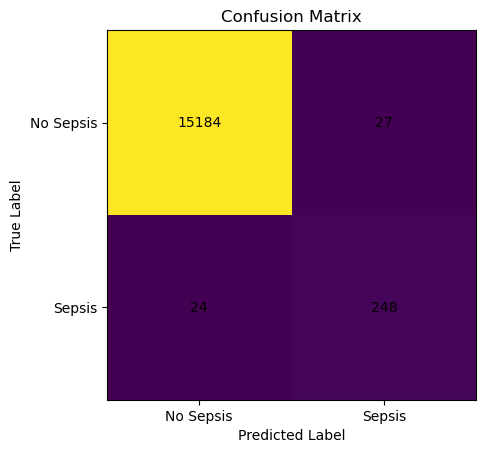


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15211
           1       0.90      0.91      0.91       272

    accuracy                           1.00     15483
   macro avg       0.95      0.95      0.95     15483
weighted avg       1.00      1.00      1.00     15483



In [9]:
# Cell 6: Evaluate model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Plot ROC curve
plot_roc_auc(model, X_test, y_test)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=("No Sepsis", "Sepsis"))

# Print classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))